In [17]:
from dotenv import load_dotenv
import requests
import pandas as pd
import os
import pprint

load_dotenv()

api_key = os.getenv("ALPHA_API_KEY")

In [18]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={api_key}'
r = requests.get(url)
data = r.json()

#pprint.pprint(data)
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [19]:
data["Meta Data"]

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-03-20',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [20]:
data["Time Series (Daily)"]

{'2024-03-20': {'1. open': '192.9200',
  '2. high': '193.9800',
  '3. low': '191.3300',
  '4. close': '193.9500',
  '5. volume': '3233474'},
 '2024-03-19': {'1. open': '191.4900',
  '2. high': '193.5800',
  '3. low': '190.2800',
  '4. close': '193.3400',
  '5. volume': '5317341'},
 '2024-03-18': {'1. open': '191.7000',
  '2. high': '193.2300',
  '3. low': '190.3200',
  '4. close': '191.6900',
  '5. volume': '5410562'},
 '2024-03-15': {'1. open': '191.9900',
  '2. high': '193.0573',
  '3. low': '190.7000',
  '4. close': '191.0700',
  '5. volume': '8828184'},
 '2024-03-14': {'1. open': '196.9500',
  '2. high': '197.7480',
  '3. low': '192.1200',
  '4. close': '193.4300',
  '5. volume': '4102202'},
 '2024-03-13': {'1. open': '197.5500',
  '2. high': '198.1000',
  '3. low': '195.3200',
  '4. close': '196.7000',
  '5. volume': '3960737'},
 '2024-03-12': {'1. open': '192.4600',
  '2. high': '199.1800',
  '3. low': '192.1500',
  '4. close': '197.7800',
  '5. volume': '5862512'},
 '2024-03-11'

In [21]:
data["Time Series (Daily)"]["2024-03-18"]

{'1. open': '191.7000',
 '2. high': '193.2300',
 '3. low': '190.3200',
 '4. close': '191.6900',
 '5. volume': '5410562'}

In [22]:
data["Time Series (Daily)"]["2024-03-18"]["5. volume"]

'5410562'

In [23]:
pd.DataFrame(data["Time Series (Daily)"]).transpose()

,1. open,2. high,3. low,4. close,5. volume
2024-03-20,192.9200,193.9800,191.3300,193.9500,3233474
2024-03-19,191.4900,193.5800,190.2800,193.3400,5317341
2024-03-18,191.7000,193.2300,190.3200,191.6900,5410562
2024-03-15,191.9900,193.0573,190.7000,191.0700,8828184
2024-03-14,196.9500,197.7480,192.1200,193.4300,4102202
...,...,...,...,...,...
2023-11-01,145.0000,146.5100,144.4500,145.4000,4750081
2023-10-31,143.0000,144.7600,142.5900,144.6400,6592041
2023-10-30,143.1900,144.5000,142.5800,142.6300,4204190
2023-10-27,143.6200,144.7000,141.7100,142.5200,5469227


In [24]:
## Make Interate over several stocks

In [25]:
symbols = ["AMD", "TSM", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [28]:
stock_list[0]

2024-03-20    179.73
2024-03-19    181.42
2024-03-18    190.65
2024-03-15    191.06
2024-03-14    187.06
               ...  
2023-11-01    108.04
2023-10-31     98.50
2023-10-30     96.18
2023-10-27     96.43
2023-10-26     93.67
Name: AMD, Length: 100, dtype: float64

In [29]:
len(stock_list)

4

In [31]:
stocks = pd.concat(stock_list, axis=1)
stocks

,AMD,TSM,TSLA,IBM
2024-03-20,179.73,136.77,175.66,193.95
2024-03-19,181.42,134.87,171.32,193.34
2024-03-18,190.65,136.64,173.80,191.69
2024-03-15,191.06,136.98,163.57,191.07
2024-03-14,187.06,139.62,162.50,193.43
...,...,...,...,...
2023-11-01,108.04,87.80,205.66,145.40
2023-10-31,98.50,86.31,200.84,144.64
2023-10-30,96.18,86.06,197.36,142.63
2023-10-27,96.43,85.99,207.30,142.52


In [39]:
import plotly_express as px

px.line(stocks, x=stocks.index, y=stocks.columns)

In [40]:
## Working with time series

In [43]:
print(stocks.index.dtype)
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()


object
datetime64[ns]


,AMD,TSM,TSLA,IBM
2024-03-20,179.73,136.77,175.66,193.95
2024-03-19,181.42,134.87,171.32,193.34
2024-03-18,190.65,136.64,173.80,191.69
2024-03-15,191.06,136.98,163.57,191.07
2024-03-14,187.06,139.62,162.50,193.43


In [47]:
stocks.loc["2023-10"]

,AMD,TSM,TSLA,IBM
2023-10-31,98.50,86.31,200.84,144.64
2023-10-30,96.18,86.06,197.36,142.63
2023-10-27,96.43,85.99,207.30,142.52
2023-10-26,93.67,87.45,205.76,143.76


In [49]:
stocks.sort_index().loc["2024-01":"2024-03"]

,AMD,TSM,TSLA,IBM
2024-01-02,138.58,101.53,248.42,161.50
2024-01-03,135.32,100.17,238.45,160.10
2024-01-04,136.01,99.13,237.93,160.86
2024-01-05,138.58,99.61,237.49,159.16
2024-01-08,146.18,102.24,240.45,161.14
2024-01-09,149.26,101.89,234.96,160.08
2024-01-10,148.54,100.80,233.94,161.23
2024-01-11,148.02,101.22,227.22,162.16
2024-01-12,146.56,101.24,218.89,165.80
2024-01-16,158.74,101.67,219.91,166.96


In [50]:
## Plot 4 stocks in subplots

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

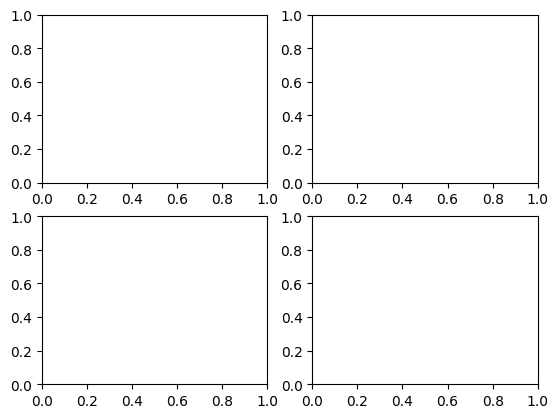

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
axes

In [59]:
axes.shape

(2, 2)

In [57]:
axes.flatten(), axes.flatten().shape

(array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object), (4,))

Text(0.5, 1.03, 'Stocks in 2024')

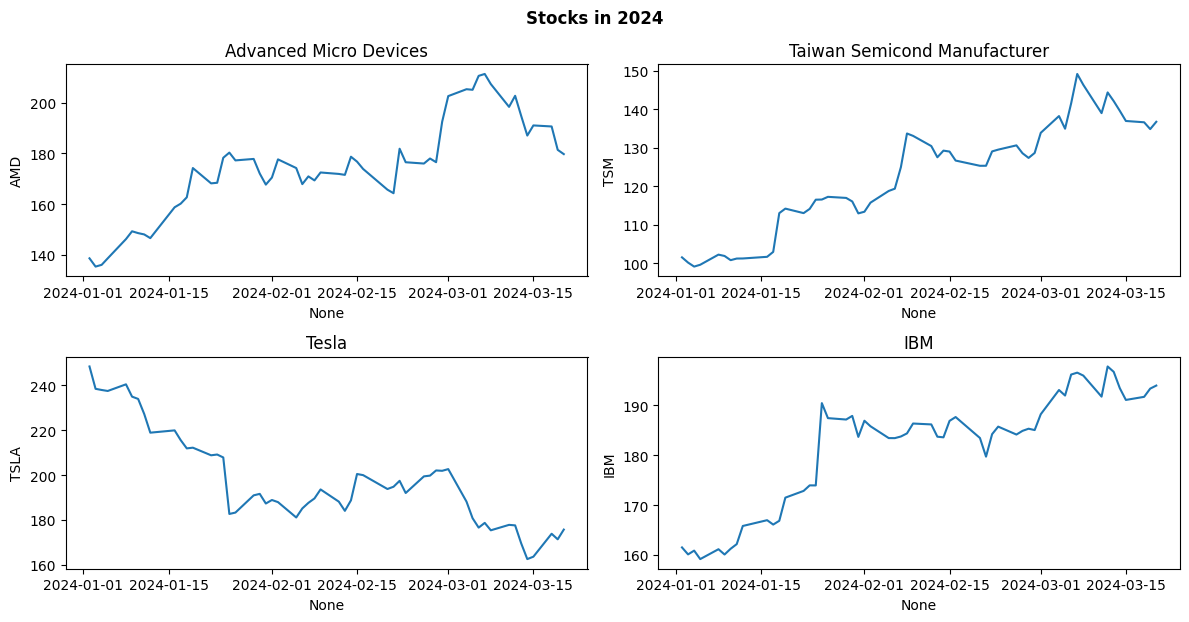

In [67]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

stock_names = {"AMD": "Advanced Micro Devices", "TSM": "Taiwan Semicond Manufacturer", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks.loc["2024"], x=stocks.loc["2024"].index, y=symbol, ax=ax)
    ax.set(title=f"{stock_names[symbol]}")

fig.tight_layout()
fig.suptitle("Stocks in 2024", y=1.03, fontweight="bold")